# Cluster analysis

## Setup 

In [1]:
import pandas as pd

### Load cluster data

In [4]:
clstr_data = 'all_filtered_5_unique_no_stop_50_clstr_analysis.tsv'

In [5]:
clstr_df = pd.read_csv(clstr_data, sep='\t')

In [6]:
clstr_df

,cluster_name,cluster_size,cluster_representative,cluster_members_with_identities
0,Cluster_0,434,uniprot_092261,"onekp_013169 (50.75), onekp_013222 (51.70), on..."
1,Cluster_1,1015,uniprot_184506,"onekp_013190 (67.28), onekp_014992 (69.03), on..."
2,Cluster_2,67,uniprot_232045,"tsa_044358 (100.00), tsa_044359 (98.53), tsa_0..."
3,Cluster_3,4972,uniprot_238978,"onekp_013136 (64.93), onekp_013137 (62.94), on..."
4,Cluster_4,28,mgnify_new_078054,"uniprot_129026 (73.72), uniprot_132729 (59.27)..."
...,...,...,...,...
21283,Cluster_21283,1,bfd_272224,bfd_272224 (100)
21284,Cluster_21284,1,tsa_010247,tsa_010247 (100)
21285,Cluster_21285,1,tsa_021378,tsa_021378 (100)
21286,Cluster_21286,1,tsa_045865,tsa_045865 (100)


### Load data annotation

In [85]:
data = '../annotation/all_annotation.txt'
data_df = pd.read_csv(data, sep='\t')

C:\Users\terca\AppData\Local\Temp\ipykernel_16936\669785089.py:2: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(data, sep='\t')


In [87]:
data_df.set_index('id', inplace=True)

In [86]:
data_df

,id,architecture_pfam,architecture_l_pfam,PF06330.14,PF01397.24,PF03936.19,PF00494.22,PF13249.9,PF19086.3,PF13243.9,...,0047573,record_id,record_description,new_id,organism,tax_id,lineage,superkingdom,kingdom,phylum
0,bfd_106193,['PF13249.9'],['PF13249.9'],0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,SRR6201996_7633546,SRR6201996_7633546,bfd_106193,soil metagenome,410658,{'species': 'soil metagenome'},Metagenome,environmental,unknown
1,bfd_118229,"['PF13249.9', 'PF13243.9']","['PF13249.9', 'PF13243.9']",0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,NaN,SRR6201996_6898523,SRR6201996_6898523,bfd_118229,soil metagenome,410658,{'species': 'soil metagenome'},Metagenome,environmental,unknown
2,bfd_059047,"['PF13249.9', 'PF13243.9']","['PF13249.9', 'PF13243.9']",0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,NaN,LakMenEpi03Aug12_release.lakeMendotaPanAssembl...,LakMenEpi03Aug12_release.lakeMendotaPanAssembl...,bfd_059047,unknown,error,error,unknown,unknown,unknown
3,bfd_096880,['PF00494.22'],['PF00494.22'],0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,tr|A0A1X2IZU6|A0A1X2IZU6_9FUNG,tr|A0A1X2IZU6|A0A1X2IZU6_9FUNG Lycopene beta-c...,bfd_096880,Absidia repens,90262,"{'species': 'Absidia repens', 'genus': 'Absidi...",Eukaryota,Fungi,Mucoromycota
4,bfd_097326,"['PF13243.9_partial', 'PF13243.9_partial']","['PF13243.9_partial', 'PF13243.9_partial']",0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,NaN,SRR5688572_25174748,SRR5688572_25174748,bfd_097326,soil metagenome,410658,{'species': 'soil metagenome'},Metagenome,environmental,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682466,uniprot_163936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,A0A1L7CGW2,A0A1L7CGW2\torganism: Corynebacterium aquilae ...,uniprot_163936,Corynebacterium aquilae DSM 44791,1431546,"{'species': 'Corynebacterium aquilae', 'genus'...",Bacteria,unknown,Actinomycetota
682467,uniprot_188186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,A0A3B4CPX3,A0A3B4CPX3\torganism: Pygocentrus nattereri (R...,uniprot_188186,Pygocentrus nattereri,42514,"{'species': 'Pygocentrus nattereri', 'genus': ...",Eukaryota,Metazoa,Chordata
682468,uniprot_229305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NoUniProtID,NoUniProtID\torganism: Treponema sp.\tdatabase...,uniprot_229305,Treponema sp.,166,"{'species': 'Treponema sp.', 'genus': 'Trepone...",Bacteria,unknown,Spirochaetota
682469,uniprot_181461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,A0A2T3JZ50,A0A2T3JZ50\torganism: Photobacterium phosphore...,uniprot_181461,Photobacterium phosphoreum,659,"{'species': 'Photobacterium phosphoreum', 'gen...",Bacteria,unknown,Pseudomonadota


## Cluster size

In [47]:
clstr_df[clstr_df['cluster_size']>100].shape[0]

797

In [46]:
clstr_df[clstr_df['cluster_size']==1].shape[0]

8586

<Axes: >

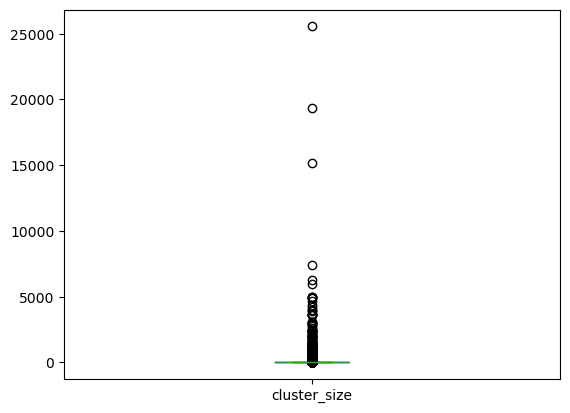

In [23]:
clstr_df.plot.box(column='cluster_size')

<Axes: ylabel='Frequency'>

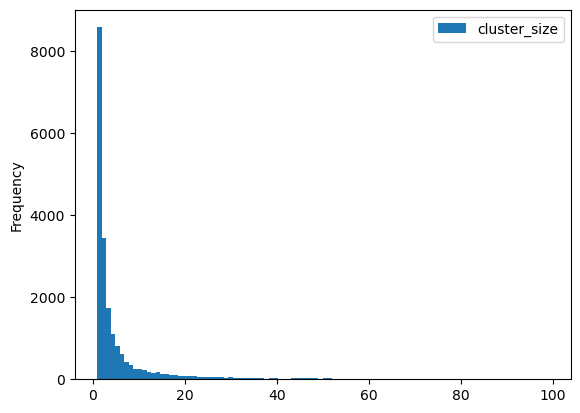

In [22]:
clstr_df[clstr_df['cluster_size']<100].plot.hist(column='cluster_size', bins=100)

## Cluster members

In [195]:
def get_members(x):
    entries = [entry.split()[0] for entry in x.split(', ')]
    return entries

In [196]:
clstr_df['cluster_members'] = clstr_df['cluster_members_with_identities'].apply(lambda x: get_members(x))

## Average cluster percent identity

In [29]:
import numpy as np

In [28]:
clstr_df

,cluster_name,cluster_size,cluster_representative,cluster_members_with_identities
0,Cluster_0,434,uniprot_092261,"onekp_013169 (50.75), onekp_013222 (51.70), on..."
1,Cluster_1,1015,uniprot_184506,"onekp_013190 (67.28), onekp_014992 (69.03), on..."
2,Cluster_2,67,uniprot_232045,"tsa_044358 (100.00), tsa_044359 (98.53), tsa_0..."
3,Cluster_3,4972,uniprot_238978,"onekp_013136 (64.93), onekp_013137 (62.94), on..."
4,Cluster_4,28,mgnify_new_078054,"uniprot_129026 (73.72), uniprot_132729 (59.27)..."
...,...,...,...,...
21283,Cluster_21283,1,bfd_272224,bfd_272224 (100)
21284,Cluster_21284,1,tsa_010247,tsa_010247 (100)
21285,Cluster_21285,1,tsa_021378,tsa_021378 (100)
21286,Cluster_21286,1,tsa_045865,tsa_045865 (100)


In [36]:
def get_average_identity(x):
    return np.mean([float(entry.split()[1].strip('()')) for entry in x.split(',')])

In [38]:
clstr_df['average_identity'] = clstr_df['cluster_members_with_identities'].apply(lambda x: get_average_identity(x))

<Axes: >

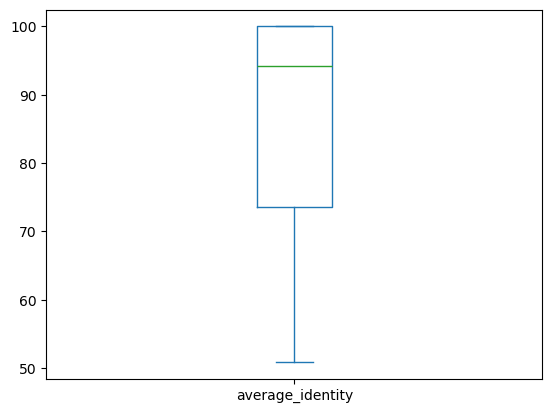

In [43]:
clstr_df['average_identity'].plot.box()

## Superkingdoms

In [89]:
data_df.loc['onekp_013169']['superkingdom']

'Eukaryota'

In [94]:
def get_superkingdoms(x):
    entries = [entry.split()[0] for entry in x.split(', ')]
    superkingdoms = [data_df.loc[entry]['superkingdom'] for entry in entries]
    return superkingdoms

In [96]:
clstr_df['superkingdoms'] = clstr_df['cluster_members_with_identities'].apply(lambda x: get_superkingdoms(x))

In [111]:
clstr_df['Eukaryota_perc'] = clstr_df['superkingdoms'].apply(lambda x: x.count('Eukaryota')/len(x))

In [112]:
clstr_df['Metagenome_perc'] = clstr_df['superkingdoms'].apply(lambda x: x.count('Metagenome')/len(x))

In [113]:
clstr_df['Archaea_perc'] = clstr_df['superkingdoms'].apply(lambda x: x.count('Archaea')/len(x))

In [114]:
clstr_df['Bacteria_perc'] = clstr_df['superkingdoms'].apply(lambda x: x.count('Bacteria')/len(x))

In [115]:
clstr_df['Viruses_perc'] = clstr_df['superkingdoms'].apply(lambda x: x.count('Viruses')/len(x))

In [116]:
clstr_df

,cluster_name,cluster_size,cluster_representative,cluster_members_with_identities,average_identity,superkingdoms,Eukaryota_perc,Metagenome_perc,Archaea_perc,Bacteria_perc,Viruses_perc
0,Cluster_0,434,uniprot_092261,"onekp_013169 (50.75), onekp_013222 (51.70), on...",56.524631,"[Eukaryota, Eukaryota, Eukaryota, Eukaryota, E...",0.398618,0.596774,0.0,0.002304,0.0
1,Cluster_1,1015,uniprot_184506,"onekp_013190 (67.28), onekp_014992 (69.03), on...",63.733635,"[Eukaryota, Eukaryota, Eukaryota, Eukaryota, E...",0.922167,0.065025,0.0,0.000000,0.0
2,Cluster_2,67,uniprot_232045,"tsa_044358 (100.00), tsa_044359 (98.53), tsa_0...",73.111940,"[Eukaryota, Eukaryota, Eukaryota, Eukaryota, E...",0.925373,0.074627,0.0,0.000000,0.0
3,Cluster_3,4972,uniprot_238978,"onekp_013136 (64.93), onekp_013137 (62.94), on...",59.703978,"[Eukaryota, Eukaryota, Eukaryota, Eukaryota, E...",0.695897,0.158286,0.0,0.115849,0.0
4,Cluster_4,28,mgnify_new_078054,"uniprot_129026 (73.72), uniprot_132729 (59.27)...",67.774643,"[unknown, Bacteria, Bacteria, Bacteria, Bacter...",0.000000,0.535714,0.0,0.357143,0.0
...,...,...,...,...,...,...,...,...,...,...,...
21283,Cluster_21283,1,bfd_272224,bfd_272224 (100),100.000000,[Metagenome],0.000000,1.000000,0.0,0.000000,0.0
21284,Cluster_21284,1,tsa_010247,tsa_010247 (100),100.000000,[Eukaryota],1.000000,0.000000,0.0,0.000000,0.0
21285,Cluster_21285,1,tsa_021378,tsa_021378 (100),100.000000,[Eukaryota],1.000000,0.000000,0.0,0.000000,0.0
21286,Cluster_21286,1,tsa_045865,tsa_045865 (100),100.000000,[Eukaryota],1.000000,0.000000,0.0,0.000000,0.0


In [130]:
clstr_df.shape[0]

21288

In [131]:
clstr_df[(clstr_df['Eukaryota_perc']>0.75) | (clstr_df['Archaea_perc']>0.75) | (clstr_df['Bacteria_perc']>0.75) | (clstr_df['Viruses_perc']>0.75)].shape[0]

10334

49% of clusters are composed by 75% of the same superkingdom (excl. Metagenome as superkingdom) or 77% if we consider metagenome as a superkingdom.

In [133]:
clstr_df[(clstr_df['Eukaryota_perc']>0.75) | (clstr_df['Archaea_perc']>0.75) | (clstr_df['Bacteria_perc']>0.75) | (clstr_df['Viruses_perc']>0.75)].shape[0]/clstr_df.shape[0]

0.48543780533633973

In [132]:
clstr_df[(clstr_df['Metagenome_perc']>0.75) | (clstr_df['Eukaryota_perc']>0.75) | (clstr_df['Archaea_perc']>0.75) | (clstr_df['Bacteria_perc']>0.75) | (clstr_df['Viruses_perc']>0.75)].shape[0]

16487

In [134]:
clstr_df[(clstr_df['Metagenome_perc']>0.75) | (clstr_df['Eukaryota_perc']>0.75) | (clstr_df['Archaea_perc']>0.75) | (clstr_df['Bacteria_perc']>0.75) | (clstr_df['Viruses_perc']>0.75)].shape[0]/clstr_df.shape[0]

0.7744738819992484

In [139]:
data_df[data_df['kingdom'] == 'Viridiplantae']

,architecture_pfam,architecture_l_pfam,PF06330.14,PF01397.24,PF03936.19,PF00494.22,PF13249.9,PF19086.3,PF13243.9,architecture_supfam,...,0047573,record_id,record_description,new_id,organism,tax_id,lineage,superkingdom,kingdom,phylum
id,,,,,,,,,,,,,,,,,,,,,
bfd_081814,"['PF01397.24', 'PF03936.19']","['PF01397.24', 'PF03936.19']",0.0,1.0,1.0,0.0,0.0,1.0,0.0,['0048261'],...,1.0,tr|A0A0A0RM14|A0A0A0RM14_MATCR,tr|A0A0A0RM14|A0A0A0RM14_MATCR Sesquiterpene c...,bfd_081814,Matricaria chamomilla var. recutita (German ch...,127986,"{'species': 'Matricaria chamomilla', 'genus': ...",Eukaryota,Viridiplantae,Streptophyta
bfd_049008,"['PF01397.24', 'PF03936.19']","['PF01397.24', 'PF03936.19']",0.0,1.0,1.0,0.0,0.0,1.0,0.0,['0053355'],...,1.0,tr|A0A1D6LTV2|A0A1D6LTV2_MAIZE,tr|A0A1D6LTV2|A0A1D6LTV2_MAIZE Terpene synthas...,bfd_049008,Zea mays (Maize),4577,"{'species': 'Zea mays', 'genus': 'Zea', 'famil...",Eukaryota,Viridiplantae,Streptophyta
bfd_057118,"['PF01397.24', 'PF03936.19']","['PF01397.24', 'PF03936.19']",0.0,1.0,1.0,0.0,0.0,1.0,0.0,['0048261'],...,1.0,sp|F6M8H7|SMST_SANMU,sp|F6M8H7|SMST_SANMU Probable sesquiterpene sy...,bfd_057118,Santalum murrayanum (Bitter quandong),453085,"{'species': 'Santalum murrayanum', 'genus': 'S...",Eukaryota,Viridiplantae,Streptophyta
bfd_117323,"['PF13249.9', 'PF13243.9']","['PF13249.9', 'PF13243.9']",0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,...,NaN,tr|A0A1J3F9H3|A0A1J3F9H3_NOCCA,tr|A0A1J3F9H3|A0A1J3F9H3_NOCCA Terpene cyclase...,bfd_117323,Noccaea caerulescens (Alpine penny-cress) (Thl...,107243,"{'species': 'Noccaea caerulescens', 'genus': '...",Eukaryota,Viridiplantae,Streptophyta
bfd_114147,"['PF01397.24', 'PF03936.19']","['PF01397.24', 'PF03936.19']",0.0,1.0,1.0,0.0,0.0,1.0,0.0,['0053355'],...,1.0,tr|A0A061F5L3|A0A061F5L3_THECC,tr|A0A061F5L3|A0A061F5L3_THECC Delta-cadinene ...,bfd_114147,Theobroma cacao (Cacao) (Cocoa),3641,"{'species': 'Theobroma cacao', 'genus': 'Theob...",Eukaryota,Viridiplantae,Streptophyta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uniprot_142320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['0046340'],...,0.0,A0A061EH03,A0A061EH03\torganism: Theobroma cacao (Cacao);...,uniprot_142320,Theobroma cacao,3641,"{'species': 'Theobroma cacao', 'genus': 'Theob...",Eukaryota,Viridiplantae,Streptophyta
uniprot_204944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['0046340'],...,1.0,A0A5N5H6C8,A0A5N5H6C8\torganism: Pyrus ussuriensis x Pyru...,uniprot_204944,Pyrus ussuriensis x Pyrus communis,2448454,{'species': 'Pyrus ussuriensis x Pyrus communi...,Eukaryota,Viridiplantae,Streptophyta
uniprot_153908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['0046340'],...,1.0,A0A0U3B401,A0A0U3B401\torganism: Leucosceptrum canum (Hai...,uniprot_153908,Leucosceptrum canum,694369,"{'species': 'Leucosceptrum canum', 'genus': 'L...",Eukaryota,Viridiplantae,Streptophyta


In [210]:
data_df[data_df['kingdom'] == 'Plantae']

,architecture_pfam,architecture_l_pfam,PF06330.14,PF01397.24,PF03936.19,PF00494.22,PF13249.9,PF19086.3,PF13243.9,architecture_supfam,...,0047573,record_id,record_description,new_id,organism,tax_id,lineage,superkingdom,kingdom,phylum
id,,,,,,,,,,,,,,,,,,,,,


## Pfam and Supfam domains

In [140]:
data_df.columns

Index(['architecture_pfam', 'architecture_l_pfam', 'PF06330.14', 'PF01397.24',
       'PF03936.19', 'PF00494.22', 'PF13249.9', 'PF19086.3', 'PF13243.9',
       'architecture_supfam', 'architecture_l_supfam', '0041184', '0053354',
       '0053355', '0048261', '0048806', '0046340', '0047573', 'record_id',
       'record_description', 'new_id', 'organism', 'tax_id', 'lineage',
       'superkingdom', 'kingdom', 'phylum'],
      dtype='object')

In [144]:
def get_pfam_dom_perc(x, pfam):
    entries = [entry.split()[0] for entry in x.split(', ')]
    pfams = [data_df.loc[entry][pfam] for entry in entries]
    return pfams.count(1)/len(pfams)

In [150]:
pfams = ['PF06330.14', 'PF01397.24', 'PF03936.19', 'PF00494.22', 'PF13249.9', 'PF19086.3', 'PF13243.9']
for pfam in pfams:
    clstr_df[f'{pfam}_perc'] = clstr_df['cluster_members_with_identities'].apply(lambda x: get_pfam_dom_perc(x,pfam))

In [152]:
supfams = ['0041184', '0053354', '0053355', '0048261', '0048806', '0046340', '0047573']
for supfam in supfams:
    clstr_df[f'{supfam}_perc'] = clstr_df['cluster_members_with_identities'].apply(lambda x: get_pfam_dom_perc(x,supfam))

In [153]:
clstr_df

,cluster_name,cluster_size,cluster_representative,cluster_members_with_identities,average_identity,superkingdoms,Eukaryota_perc,Metagenome_perc,Archaea_perc,Bacteria_perc,...,PF13249.9_perc,PF19086.3_perc,PF13243.9_perc,0041184_perc,0053354_perc,0053355_perc,0048261_perc,0048806_perc,0046340_perc,0047573_perc
0,Cluster_0,434,uniprot_092261,"onekp_013169 (50.75), onekp_013222 (51.70), on...",56.524631,"[Eukaryota, Eukaryota, Eukaryota, Eukaryota, E...",0.398618,0.596774,0.0,0.002304,...,0.0,0.0,0.0,0.0,0.002304,0.055300,0.055300,0.811060,0.864055,0.815668
1,Cluster_1,1015,uniprot_184506,"onekp_013190 (67.28), onekp_014992 (69.03), on...",63.733635,"[Eukaryota, Eukaryota, Eukaryota, Eukaryota, E...",0.922167,0.065025,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.010837,0.005911,1.000000,1.000000,0.914286
2,Cluster_2,67,uniprot_232045,"tsa_044358 (100.00), tsa_044359 (98.53), tsa_0...",73.111940,"[Eukaryota, Eukaryota, Eukaryota, Eukaryota, E...",0.925373,0.074627,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.567164
3,Cluster_3,4972,uniprot_238978,"onekp_013136 (64.93), onekp_013137 (62.94), on...",59.703978,"[Eukaryota, Eukaryota, Eukaryota, Eukaryota, E...",0.695897,0.158286,0.0,0.115849,...,0.0,0.0,0.0,0.0,0.000000,0.000402,0.001609,0.609815,1.000000,0.667739
4,Cluster_4,28,mgnify_new_078054,"uniprot_129026 (73.72), uniprot_132729 (59.27)...",67.774643,"[unknown, Bacteria, Bacteria, Bacteria, Bacter...",0.000000,0.535714,0.0,0.357143,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.892857,1.000000,0.964286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21283,Cluster_21283,1,bfd_272224,bfd_272224 (100),100.000000,[Metagenome],0.000000,1.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
21284,Cluster_21284,1,tsa_010247,tsa_010247 (100),100.000000,[Eukaryota],1.000000,0.000000,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
21285,Cluster_21285,1,tsa_021378,tsa_021378 (100),100.000000,[Eukaryota],1.000000,0.000000,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
21286,Cluster_21286,1,tsa_045865,tsa_045865 (100),100.000000,[Eukaryota],1.000000,0.000000,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [156]:
pfams

['PF06330.14',
 'PF01397.24',
 'PF03936.19',
 'PF00494.22',
 'PF13249.9',
 'PF19086.3',
 'PF13243.9']

55% of clusters contain at least one of the Pfam domains in more than 75%, 

76% of clusters contain at least one of the Supfam domains in more than 75%. 

99% of clusters contain at least one of the Pfam or Supfam domains in more than 75%.

In [159]:
clstr_df[(clstr_df['PF06330.14_perc']>0.75) | (clstr_df['PF01397.24_perc']>0.75) | (clstr_df['PF03936.19_perc']>0.75) | (clstr_df['PF00494.22_perc']>0.75) | (clstr_df['PF13249.9_perc']>0.75) | (clstr_df['PF19086.3_perc']>0.75) | (clstr_df['PF13243.9_perc']>0.75)].shape[0]/clstr_df.shape[0]

0.5553363397219091

In [160]:
clstr_df[(clstr_df['0041184_perc']>0.75) | (clstr_df['0053354_perc']>0.75) | (clstr_df['0053355_perc']>0.75) | (clstr_df['0048261_perc']>0.75) | (clstr_df['0048806_perc']>0.75) | (clstr_df['0046340_perc']>0.75) | (clstr_df['0047573_perc']>0.75)].shape[0]/clstr_df.shape[0]

0.7596768132281098

In [161]:
clstr_df[(clstr_df['PF06330.14_perc']>0.75) | (clstr_df['PF01397.24_perc']>0.75) | (clstr_df['PF03936.19_perc']>0.75) | (clstr_df['PF00494.22_perc']>0.75) | (clstr_df['PF13249.9_perc']>0.75) | (clstr_df['PF19086.3_perc']>0.75) | (clstr_df['PF13243.9_perc']>0.75) | (clstr_df['0041184_perc']>0.75) | (clstr_df['0053354_perc']>0.75) | (clstr_df['0053355_perc']>0.75) | (clstr_df['0048261_perc']>0.75) | (clstr_df['0048806_perc']>0.75) | (clstr_df['0046340_perc']>0.75) | (clstr_df['0047573_perc']>0.75)].shape[0]/clstr_df.shape[0]

0.9997181510710259

## Pfam and Supfam architectures

In [166]:
from collections import Counter

In [173]:
def get_pfam_archs(x):
    entries = [entry.split()[0] for entry in x.split(', ')]
    archs = [data_df.loc[entry]['architecture_pfam'] for entry in entries]
    archs2 = [arch for arch in archs if type(arch) == str]
    return Counter(archs2)

In [174]:
clstr_df['pfam_archs_count'] = clstr_df['cluster_members_with_identities'].apply(lambda x: get_pfam_archs(x))

In [187]:
def get_most_common_pfam_arch(x):
    entries = [entry.split()[0] for entry in x.split(', ')]
    archs = [data_df.loc[entry]['architecture_pfam'] for entry in entries]
    archs2 = [arch for arch in archs if type(arch) == str]
    c = Counter(archs2).most_common(1)
    if c == []:
        return None
    else:
        return c[0][0]

In [188]:
clstr_df['most_common_pfam_arch'] = clstr_df['cluster_members_with_identities'].apply(lambda x: get_most_common_pfam_arch(x))

In [190]:
def get_supfam_archs(x):
    entries = [entry.split()[0] for entry in x.split(', ')]
    archs = [data_df.loc[entry]['architecture_supfam'] for entry in entries]
    archs2 = [arch for arch in archs if type(arch) == str]
    return Counter(archs2)

In [191]:
clstr_df['supfam_archs_count'] = clstr_df['cluster_members_with_identities'].apply(lambda x: get_supfam_archs(x))

In [192]:
def get_most_common_supfam_arch(x):
    entries = [entry.split()[0] for entry in x.split(', ')]
    archs = [data_df.loc[entry]['architecture_supfam'] for entry in entries]
    archs2 = [arch for arch in archs if type(arch) == str]
    c = Counter(archs2).most_common(1)
    if c == []:
        return None
    else:
        return c[0][0]

In [193]:
clstr_df['most_common_supfam_arch'] = clstr_df['cluster_members_with_identities'].apply(lambda x: get_most_common_supfam_arch(x))

In [194]:
clstr_df

,cluster_name,cluster_size,cluster_representative,cluster_members_with_identities,average_identity,superkingdoms,Eukaryota_perc,Metagenome_perc,Archaea_perc,Bacteria_perc,...,0053354_perc,0053355_perc,0048261_perc,0048806_perc,0046340_perc,0047573_perc,pfam_archs_count,most_common_pfam_arch,supfam_archs_count,most_common_supfam_arch
0,Cluster_0,434,uniprot_092261,"onekp_013169 (50.75), onekp_013222 (51.70), on...",56.524631,"[Eukaryota, Eukaryota, Eukaryota, Eukaryota, E...",0.398618,0.596774,0.0,0.002304,...,0.002304,0.055300,0.055300,0.811060,0.864055,0.815668,"{'['PF00494.22_partial', 'PF00494.22_partial']...",['PF00494.22'],"{'['0046340']': 351, '['0046340', '0048806_par...",['0046340']
1,Cluster_1,1015,uniprot_184506,"onekp_013190 (67.28), onekp_014992 (69.03), on...",63.733635,"[Eukaryota, Eukaryota, Eukaryota, Eukaryota, E...",0.922167,0.065025,0.0,0.000000,...,0.000000,0.010837,0.005911,1.000000,1.000000,0.914286,"{'['PF00494.22_partial', 'PF00494.22_partial',...","['PF00494.22_partial', 'PF00494.22_partial']","{'['0046340']': 951, '['0046340_partial', '004...",['0046340']
2,Cluster_2,67,uniprot_232045,"tsa_044358 (100.00), tsa_044359 (98.53), tsa_0...",73.111940,"[Eukaryota, Eukaryota, Eukaryota, Eukaryota, E...",0.925373,0.074627,0.0,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.567164,{},None,"{'['0046340_partial', '0046340']': 28, '['0047...","['0048806_partial', '0046340']"
3,Cluster_3,4972,uniprot_238978,"onekp_013136 (64.93), onekp_013137 (62.94), on...",59.703978,"[Eukaryota, Eukaryota, Eukaryota, Eukaryota, E...",0.695897,0.158286,0.0,0.115849,...,0.000000,0.000402,0.001609,0.609815,1.000000,0.667739,"{'['PF03936.19_partial']': 465, '['PF03936.19_...",['PF03936.19_partial'],"{'['0046340']': 4892, '['0047573_partial', '00...",['0046340']
4,Cluster_4,28,mgnify_new_078054,"uniprot_129026 (73.72), uniprot_132729 (59.27)...",67.774643,"[unknown, Bacteria, Bacteria, Bacteria, Bacter...",0.000000,0.535714,0.0,0.357143,...,0.000000,0.000000,0.000000,0.892857,1.000000,0.964286,{},None,{'['0046340']': 28},['0046340']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21283,Cluster_21283,1,bfd_272224,bfd_272224 (100),100.000000,[Metagenome],0.000000,1.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,{},None,{'['0046340']': 1},['0046340']
21284,Cluster_21284,1,tsa_010247,tsa_010247 (100),100.000000,[Eukaryota],1.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,{'['PF19086.3']': 1},['PF19086.3'],{'['0048261_partial']': 1},['0048261_partial']
21285,Cluster_21285,1,tsa_021378,tsa_021378 (100),100.000000,[Eukaryota],1.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,{'['PF03936.19']': 1},['PF03936.19'],{'['0048261']': 1},['0048261']
21286,Cluster_21286,1,tsa_045865,tsa_045865 (100),100.000000,[Eukaryota],1.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,{'['PF19086.3_partial']': 1},['PF19086.3_partial'],{'['0046340']': 1},['0046340']


## Source databases

In [198]:
def get_db_perc(x, db):
    dbs = [entry.split('_')[0] for entry in x]
    return dbs.count(db)/len(dbs)

In [204]:
dbs = ['bfd', 'tsa', 'mgnify', 'uniprot', 'onekp', 'phytozome']
for db in dbs:
    clstr_df[f'{db}_perc'] = clstr_df['cluster_members'].apply(lambda x: get_db_perc(x, db))

In [205]:
clstr_df

,cluster_name,cluster_size,cluster_representative,cluster_members_with_identities,average_identity,superkingdoms,Eukaryota_perc,Metagenome_perc,Archaea_perc,Bacteria_perc,...,most_common_pfam_arch,supfam_archs_count,most_common_supfam_arch,cluster_members,bfd_perc,tsa_perc,mgnify_perc,uniprot_perc,onekp_perc,phytozome_perc
0,Cluster_0,434,uniprot_092261,"onekp_013169 (50.75), onekp_013222 (51.70), on...",56.524631,"[Eukaryota, Eukaryota, Eukaryota, Eukaryota, E...",0.398618,0.596774,0.0,0.002304,...,['PF00494.22'],"{'['0046340']': 351, '['0046340', '0048806_par...",['0046340'],"[onekp_013169, onekp_013222, onekp_013240, one...",0.569124,0.103687,0.029954,0.149770,0.145161,0.002304
1,Cluster_1,1015,uniprot_184506,"onekp_013190 (67.28), onekp_014992 (69.03), on...",63.733635,"[Eukaryota, Eukaryota, Eukaryota, Eukaryota, E...",0.922167,0.065025,0.0,0.000000,...,"['PF00494.22_partial', 'PF00494.22_partial']","{'['0046340']': 951, '['0046340_partial', '004...",['0046340'],"[onekp_013190, onekp_014992, onekp_017918, tsa...",0.048276,0.079803,0.017734,0.851232,0.002956,0.000000
2,Cluster_2,67,uniprot_232045,"tsa_044358 (100.00), tsa_044359 (98.53), tsa_0...",73.111940,"[Eukaryota, Eukaryota, Eukaryota, Eukaryota, E...",0.925373,0.074627,0.0,0.000000,...,None,"{'['0046340_partial', '0046340']': 28, '['0047...","['0048806_partial', '0046340']","[tsa_044358, tsa_044359, tsa_044364, uniprot_1...",0.000000,0.044776,0.074627,0.880597,0.000000,0.000000
3,Cluster_3,4972,uniprot_238978,"onekp_013136 (64.93), onekp_013137 (62.94), on...",59.703978,"[Eukaryota, Eukaryota, Eukaryota, Eukaryota, E...",0.695897,0.158286,0.0,0.115849,...,['PF03936.19_partial'],"{'['0046340']': 4892, '['0047573_partial', '00...",['0046340'],"[onekp_013136, onekp_013137, onekp_013157, one...",0.105994,0.286605,0.068986,0.306919,0.168343,0.063154
4,Cluster_4,28,mgnify_new_078054,"uniprot_129026 (73.72), uniprot_132729 (59.27)...",67.774643,"[unknown, Bacteria, Bacteria, Bacteria, Bacter...",0.000000,0.535714,0.0,0.357143,...,None,{'['0046340']': 28},['0046340'],"[uniprot_129026, uniprot_132729, uniprot_20743...",0.107143,0.000000,0.500000,0.392857,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21283,Cluster_21283,1,bfd_272224,bfd_272224 (100),100.000000,[Metagenome],0.000000,1.000000,0.0,0.000000,...,None,{'['0046340']': 1},['0046340'],[bfd_272224],1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21284,Cluster_21284,1,tsa_010247,tsa_010247 (100),100.000000,[Eukaryota],1.000000,0.000000,0.0,0.000000,...,['PF19086.3'],{'['0048261_partial']': 1},['0048261_partial'],[tsa_010247],0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
21285,Cluster_21285,1,tsa_021378,tsa_021378 (100),100.000000,[Eukaryota],1.000000,0.000000,0.0,0.000000,...,['PF03936.19'],{'['0048261']': 1},['0048261'],[tsa_021378],0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
21286,Cluster_21286,1,tsa_045865,tsa_045865 (100),100.000000,[Eukaryota],1.000000,0.000000,0.0,0.000000,...,['PF19086.3_partial'],{'['0046340']': 1},['0046340'],[tsa_045865],0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [207]:
clstr_df.columns

Index(['cluster_name', 'cluster_size', 'cluster_representative',
       'cluster_members_with_identities', 'average_identity', 'superkingdoms',
       'Eukaryota_perc', 'Metagenome_perc', 'Archaea_perc', 'Bacteria_perc',
       'Viruses_perc', 'PF06330.14_perc', 'PF01397.24_perc', 'PF03936.19_perc',
       'PF00494.22_perc', 'PF13249.9_perc', 'PF19086.3_perc', 'PF13243.9_perc',
       '0041184_perc', '0053354_perc', '0053355_perc', '0048261_perc',
       '0048806_perc', '0046340_perc', '0047573_perc', 'pfam_archs_count',
       'most_common_pfam_arch', 'supfam_archs_count',
       'most_common_supfam_arch', 'cluster_members', 'bfd_perc', 'tsa_perc',
       'mgnify_perc', 'uniprot_perc', 'onekp_perc', 'phytozome_perc'],
      dtype='object')

In [209]:
clstr_df[['cluster_name', 'cluster_size', 'cluster_representative', 'cluster_members',
       'cluster_members_with_identities', 'average_identity', 'superkingdoms',
       'Eukaryota_perc', 'Metagenome_perc', 'Archaea_perc', 'Bacteria_perc',
       'Viruses_perc', 'PF06330.14_perc', 'PF01397.24_perc', 'PF03936.19_perc',
       'PF00494.22_perc', 'PF13249.9_perc', 'PF19086.3_perc', 'PF13243.9_perc',
       '0041184_perc', '0053354_perc', '0053355_perc', '0048261_perc',
       '0048806_perc', '0046340_perc', '0047573_perc', 'pfam_archs_count',
       'most_common_pfam_arch', 'supfam_archs_count',
       'most_common_supfam_arch', 'bfd_perc', 'tsa_perc',
       'mgnify_perc', 'uniprot_perc', 'onekp_perc', 'phytozome_perc']]

,cluster_name,cluster_size,cluster_representative,cluster_members,cluster_members_with_identities,average_identity,superkingdoms,Eukaryota_perc,Metagenome_perc,Archaea_perc,...,pfam_archs_count,most_common_pfam_arch,supfam_archs_count,most_common_supfam_arch,bfd_perc,tsa_perc,mgnify_perc,uniprot_perc,onekp_perc,phytozome_perc
0,Cluster_0,434,uniprot_092261,"[onekp_013169, onekp_013222, onekp_013240, one...","onekp_013169 (50.75), onekp_013222 (51.70), on...",56.524631,"[Eukaryota, Eukaryota, Eukaryota, Eukaryota, E...",0.398618,0.596774,0.0,...,"{'['PF00494.22_partial', 'PF00494.22_partial']...",['PF00494.22'],"{'['0046340']': 351, '['0046340', '0048806_par...",['0046340'],0.569124,0.103687,0.029954,0.149770,0.145161,0.002304
1,Cluster_1,1015,uniprot_184506,"[onekp_013190, onekp_014992, onekp_017918, tsa...","onekp_013190 (67.28), onekp_014992 (69.03), on...",63.733635,"[Eukaryota, Eukaryota, Eukaryota, Eukaryota, E...",0.922167,0.065025,0.0,...,"{'['PF00494.22_partial', 'PF00494.22_partial',...","['PF00494.22_partial', 'PF00494.22_partial']","{'['0046340']': 951, '['0046340_partial', '004...",['0046340'],0.048276,0.079803,0.017734,0.851232,0.002956,0.000000
2,Cluster_2,67,uniprot_232045,"[tsa_044358, tsa_044359, tsa_044364, uniprot_1...","tsa_044358 (100.00), tsa_044359 (98.53), tsa_0...",73.111940,"[Eukaryota, Eukaryota, Eukaryota, Eukaryota, E...",0.925373,0.074627,0.0,...,{},None,"{'['0046340_partial', '0046340']': 28, '['0047...","['0048806_partial', '0046340']",0.000000,0.044776,0.074627,0.880597,0.000000,0.000000
3,Cluster_3,4972,uniprot_238978,"[onekp_013136, onekp_013137, onekp_013157, one...","onekp_013136 (64.93), onekp_013137 (62.94), on...",59.703978,"[Eukaryota, Eukaryota, Eukaryota, Eukaryota, E...",0.695897,0.158286,0.0,...,"{'['PF03936.19_partial']': 465, '['PF03936.19_...",['PF03936.19_partial'],"{'['0046340']': 4892, '['0047573_partial', '00...",['0046340'],0.105994,0.286605,0.068986,0.306919,0.168343,0.063154
4,Cluster_4,28,mgnify_new_078054,"[uniprot_129026, uniprot_132729, uniprot_20743...","uniprot_129026 (73.72), uniprot_132729 (59.27)...",67.774643,"[unknown, Bacteria, Bacteria, Bacteria, Bacter...",0.000000,0.535714,0.0,...,{},None,{'['0046340']': 28},['0046340'],0.107143,0.000000,0.500000,0.392857,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21283,Cluster_21283,1,bfd_272224,[bfd_272224],bfd_272224 (100),100.000000,[Metagenome],0.000000,1.000000,0.0,...,{},None,{'['0046340']': 1},['0046340'],1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21284,Cluster_21284,1,tsa_010247,[tsa_010247],tsa_010247 (100),100.000000,[Eukaryota],1.000000,0.000000,0.0,...,{'['PF19086.3']': 1},['PF19086.3'],{'['0048261_partial']': 1},['0048261_partial'],0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
21285,Cluster_21285,1,tsa_021378,[tsa_021378],tsa_021378 (100),100.000000,[Eukaryota],1.000000,0.000000,0.0,...,{'['PF03936.19']': 1},['PF03936.19'],{'['0048261']': 1},['0048261'],0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
21286,Cluster_21286,1,tsa_045865,[tsa_045865],tsa_045865 (100),100.000000,[Eukaryota],1.000000,0.000000,0.0,...,{'['PF19086.3_partial']': 1},['PF19086.3_partial'],{'['0046340']': 1},['0046340'],0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [213]:
clstr_df.to_csv('all_filtered_5_unique_no_stop_50_clstr_info.tsv', sep='\t')